In [1]:
from pm4py.objects.conversion.log import converter as log_converter 
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as xes_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.objects.conversion.process_tree import converter as pt_converter
#Heuristic and inductive miner algorithms libraries
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

C:\Users\eterz\anaconda3\lib\site-packages\pm4py\visualization\petrinet\__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")


In [2]:
#import xes.gz file and convert it to csv (file and python code in the same folder)
log = xes_importer.apply('BPI_Challenge_2012.xes.gz')
pd = xes_converter.apply(log, variant=xes_converter.Variants.TO_DATA_FRAME)

In [3]:
## Convert to log format 
log = log_converter.apply(pd)

In [4]:
net, initial_marking, final_marking = alpha_miner.apply(log)

In [5]:
# Process discovery basic model
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

<ipython-input-5-4494bce00bce>:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking)


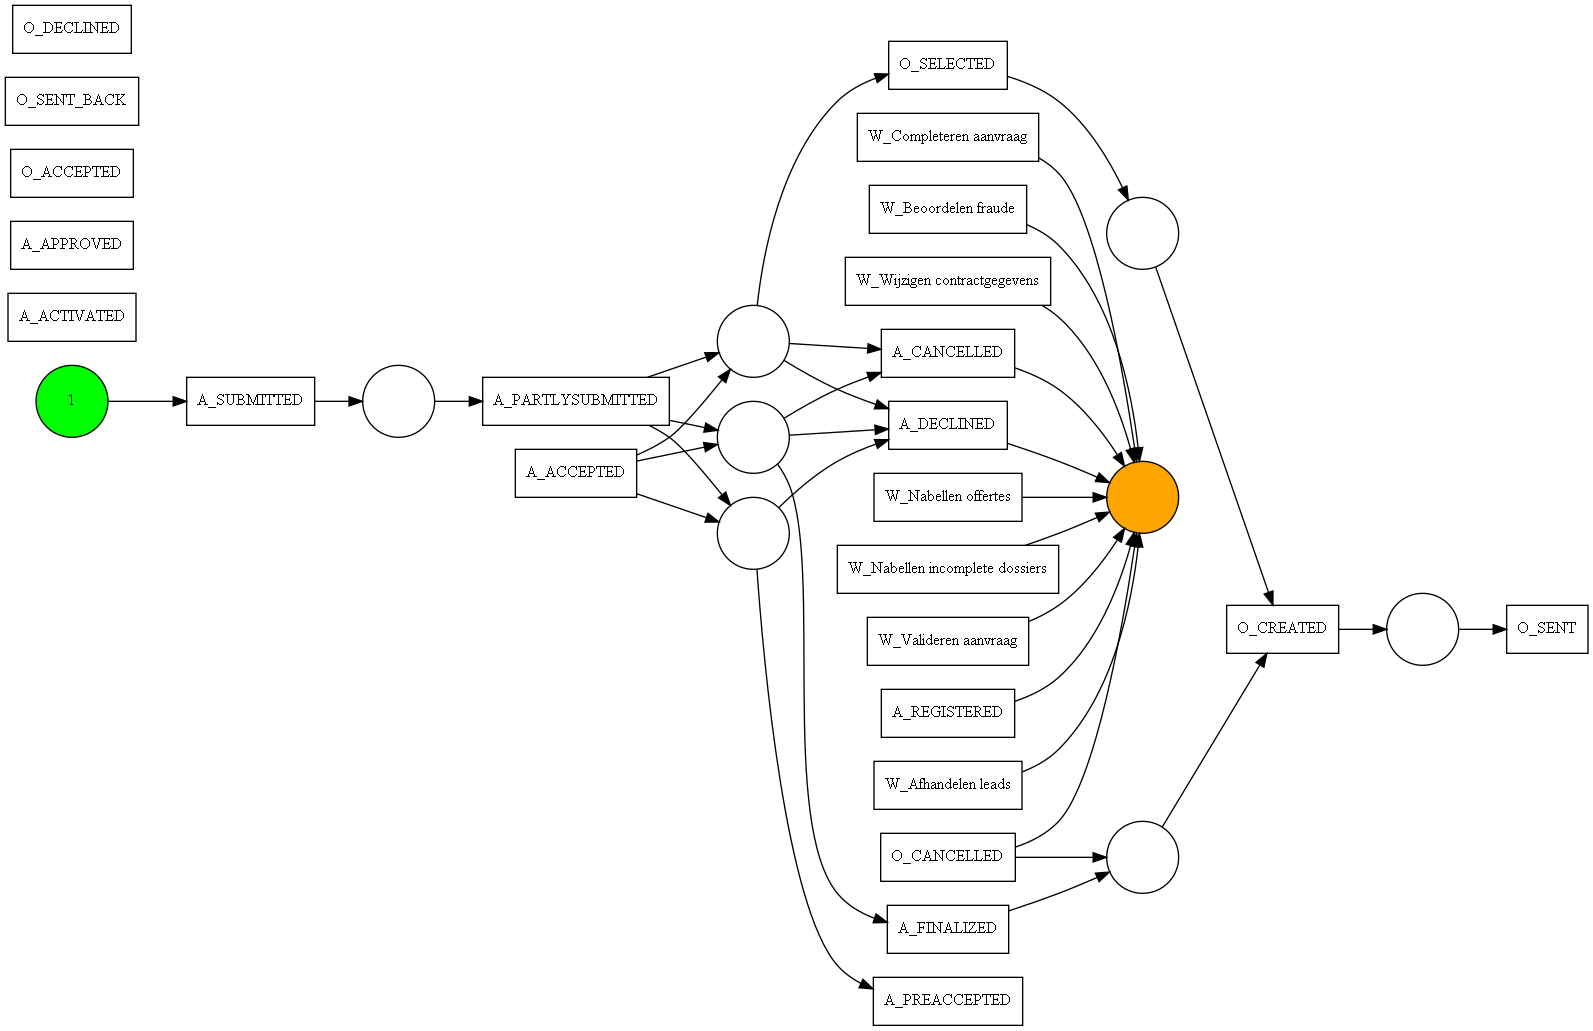

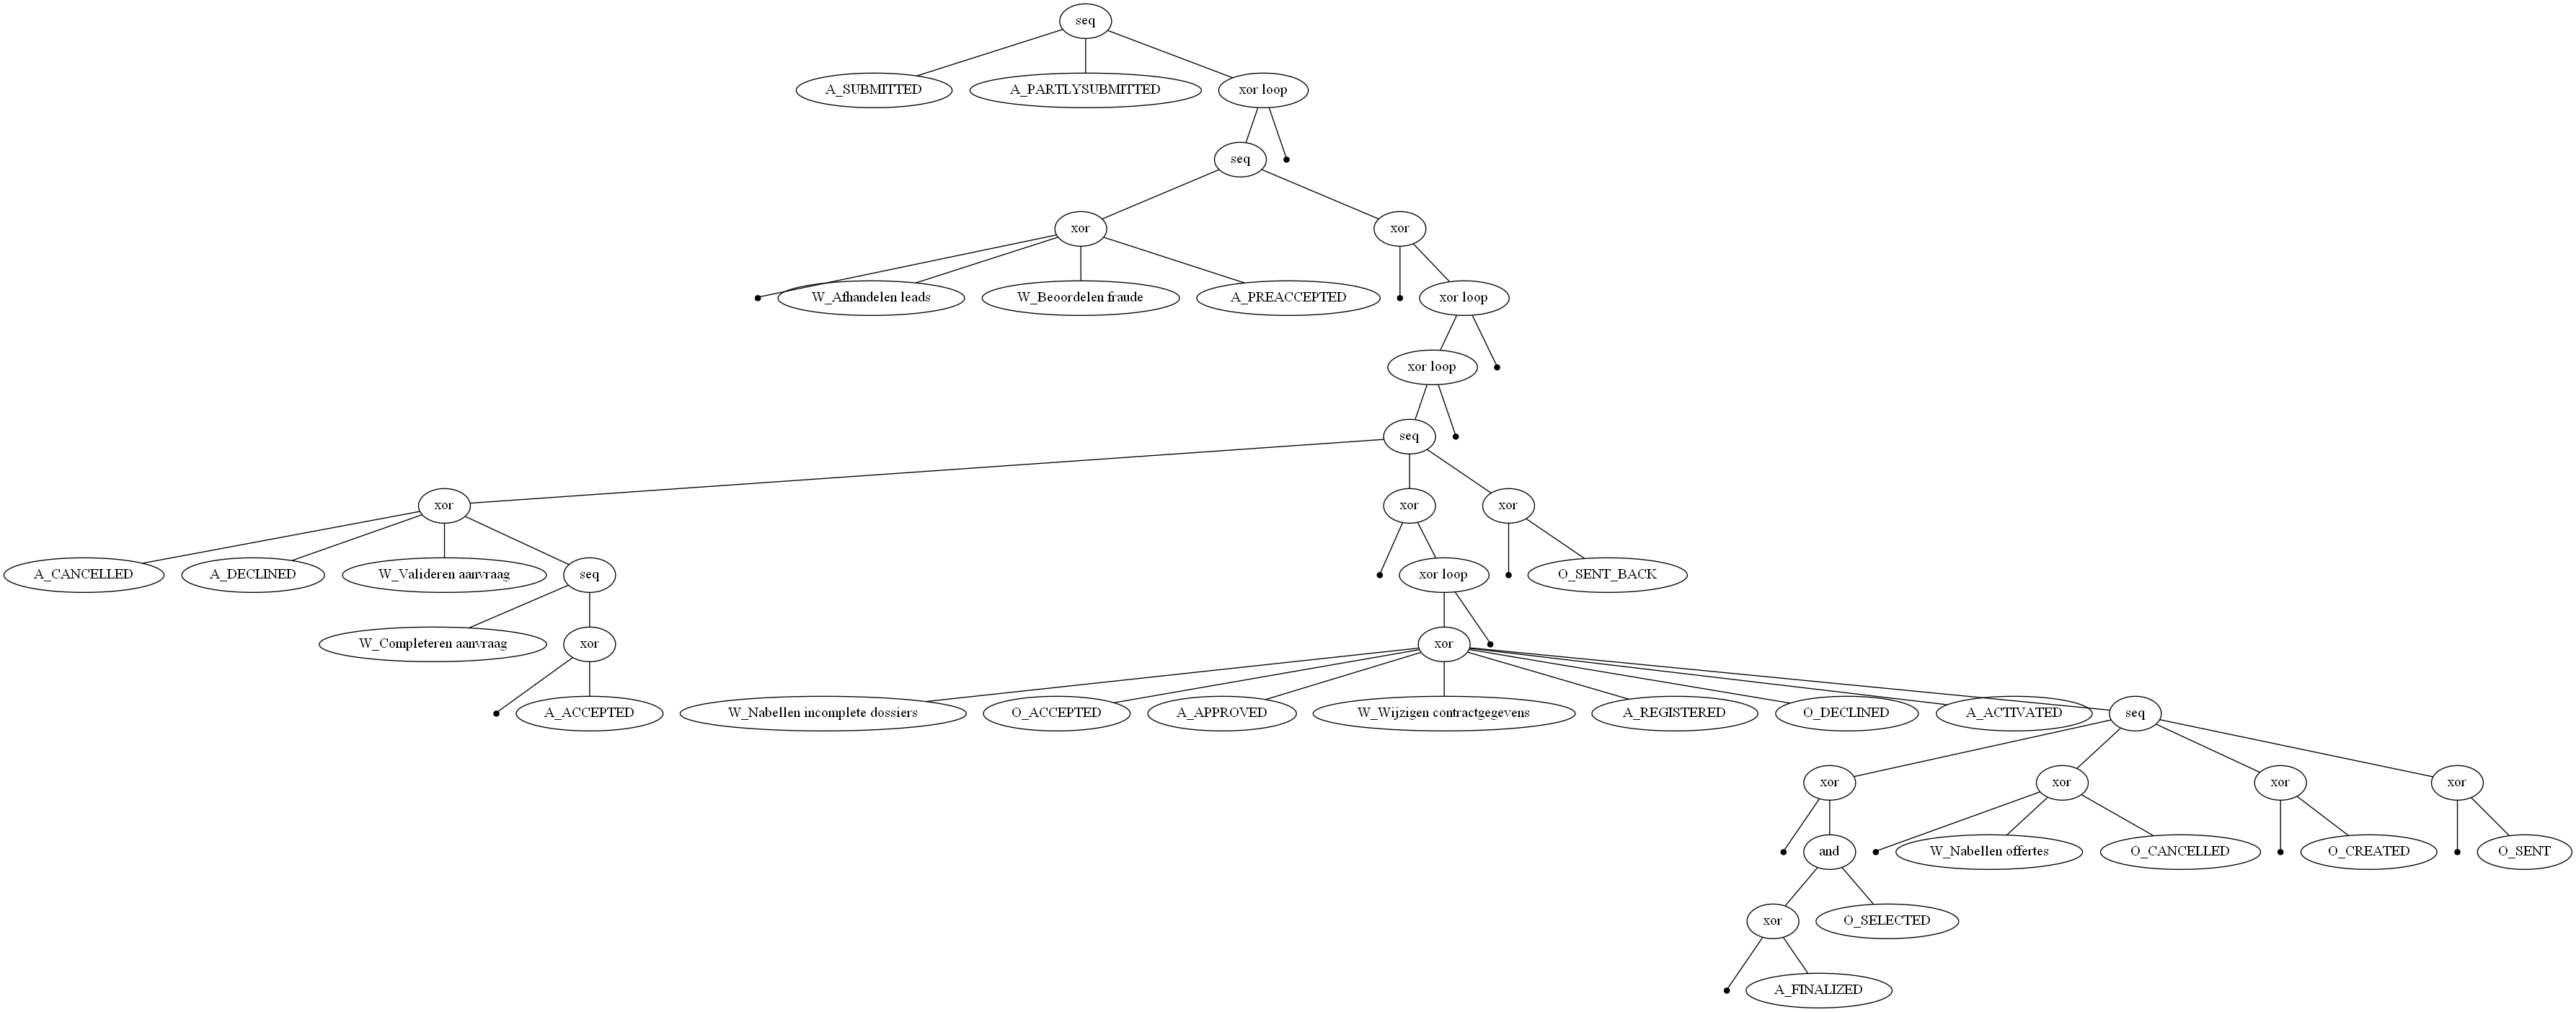

In [7]:
#Decision tree
tree = inductive_miner.apply_tree(log)

gviz1 = pt_visualizer.apply(tree)
pt_visualizer.view(gviz1)

<ipython-input-13-474678124fea>:1: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz2 = pn_visualizer.apply(net,initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY,log=log)


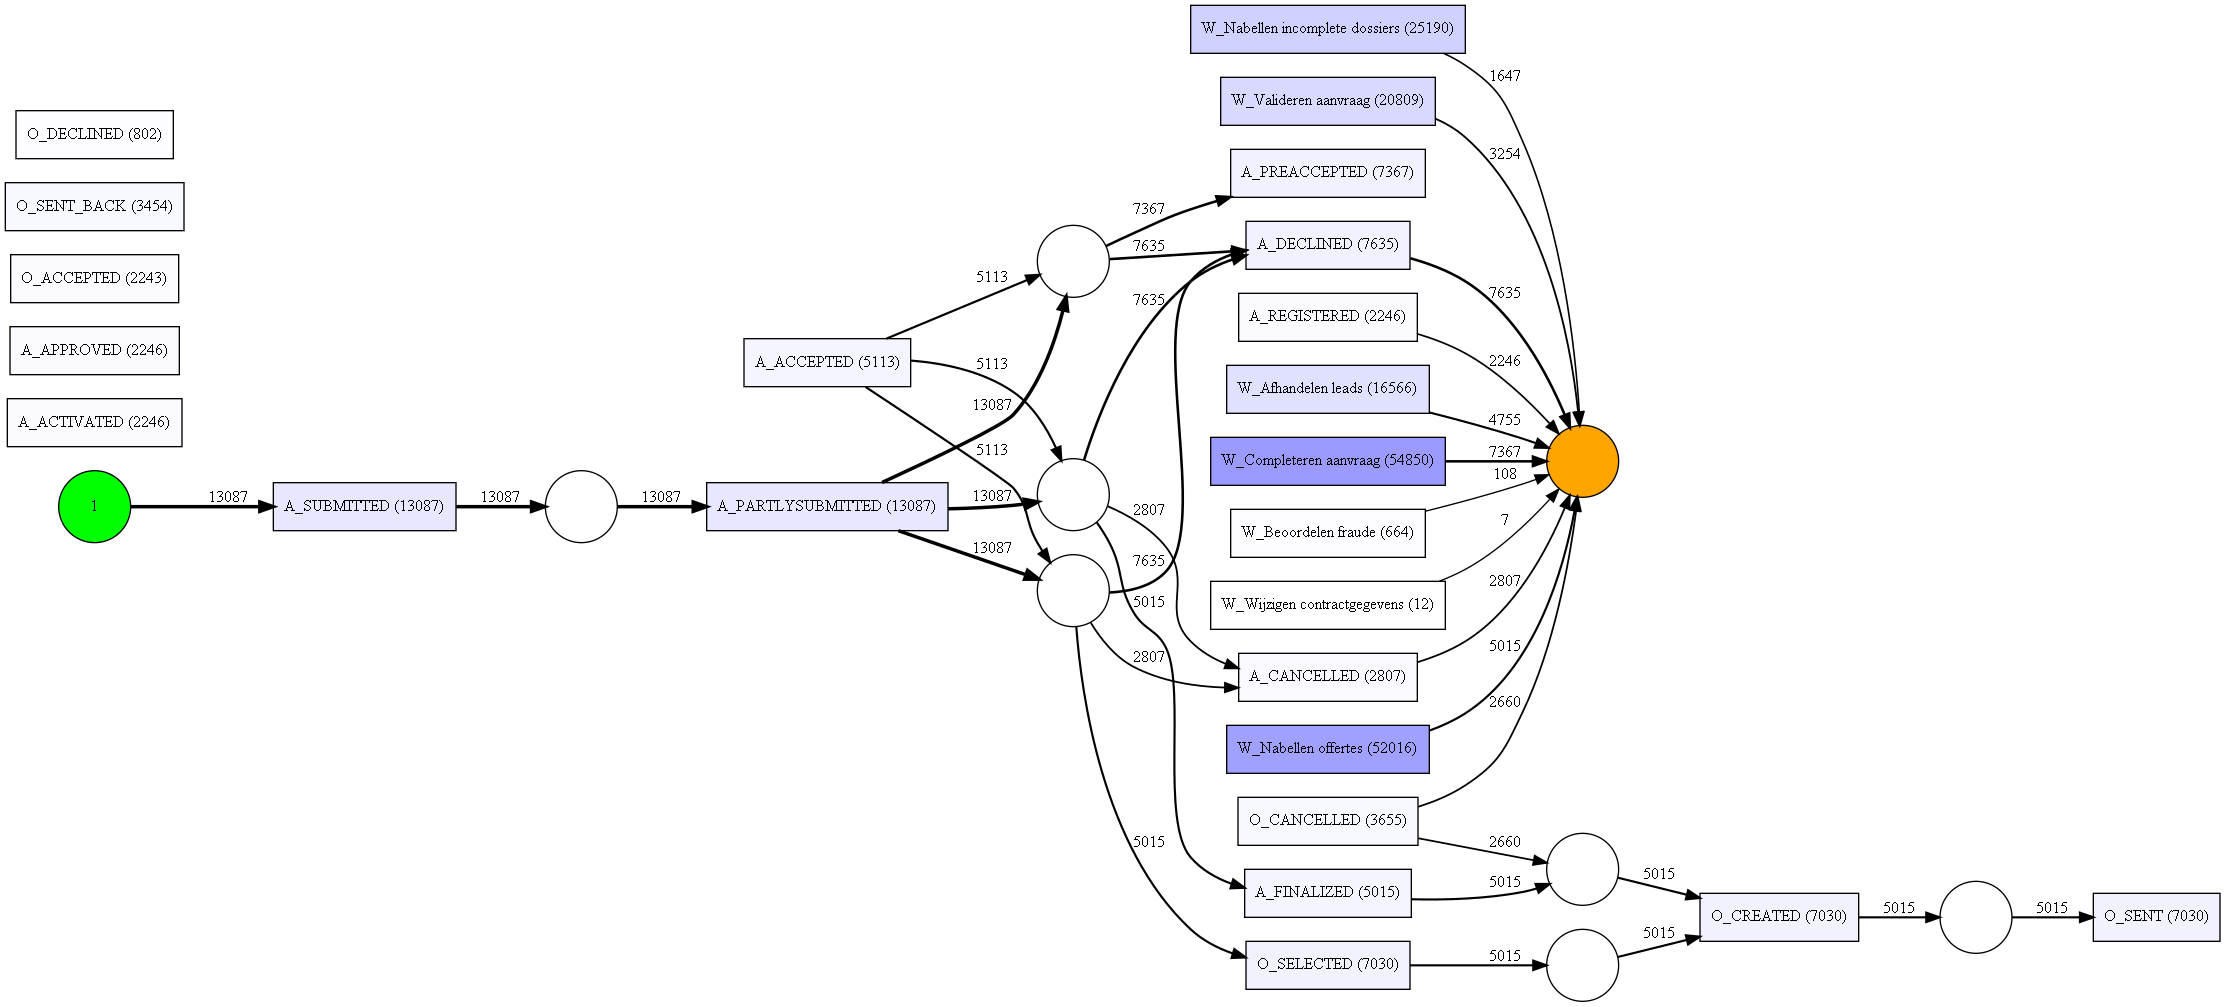

In [13]:
#With frequencies
gviz2 = pn_visualizer.apply(net,initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY,log=log)
pn_visualizer.view(gviz2)

<ipython-input-15-6e7c698b0929>:4: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, im, fm)


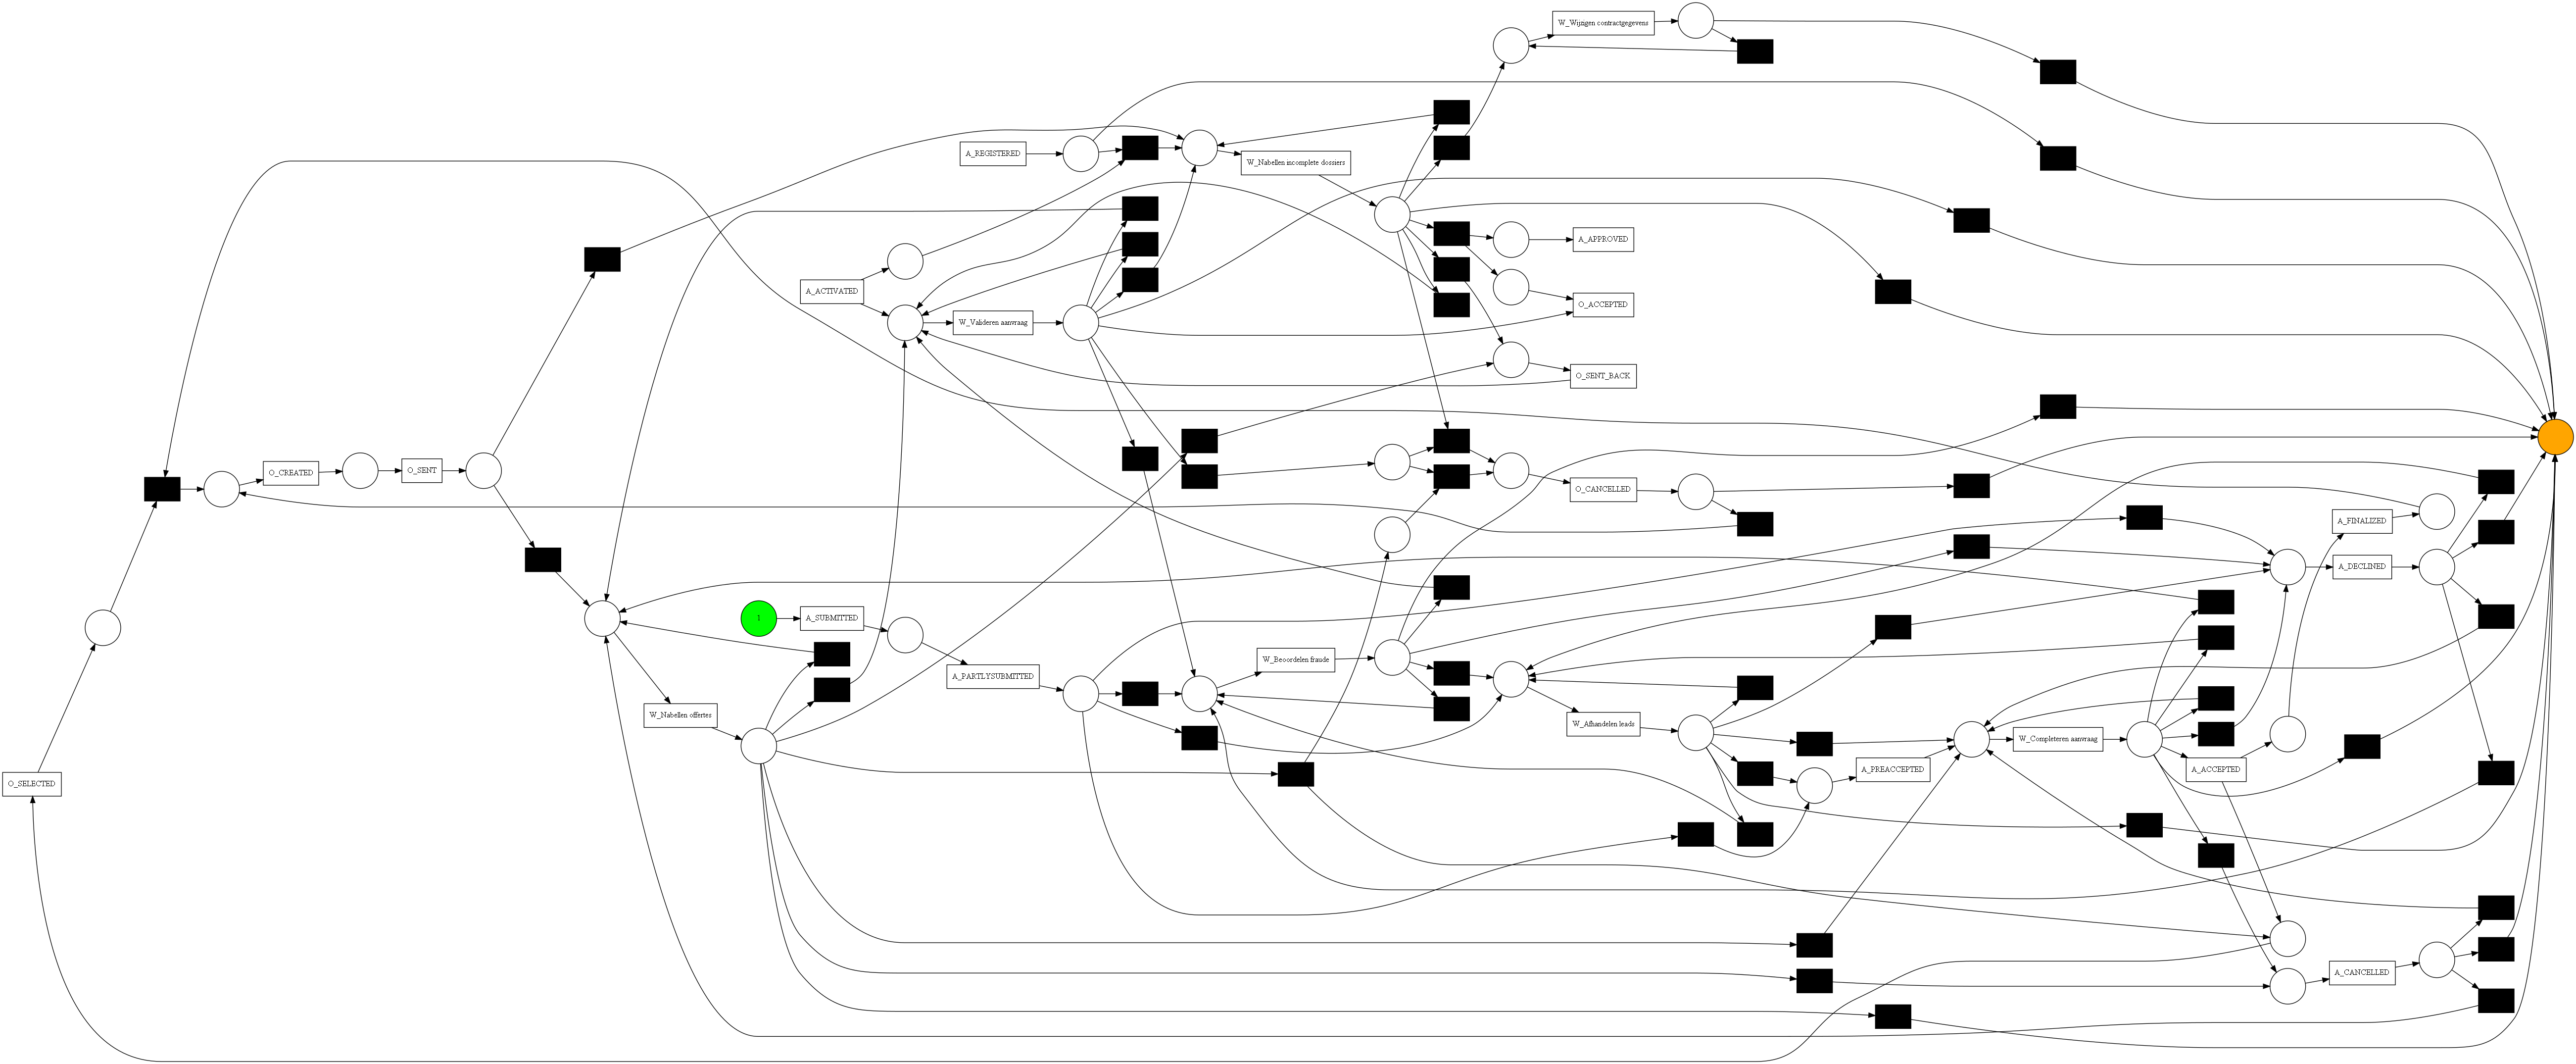

In [15]:
heu_net = heuristics_miner.apply_heu(log)
net, im, fm = heuristics_miner.apply(log)
# Petri net visualisation
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

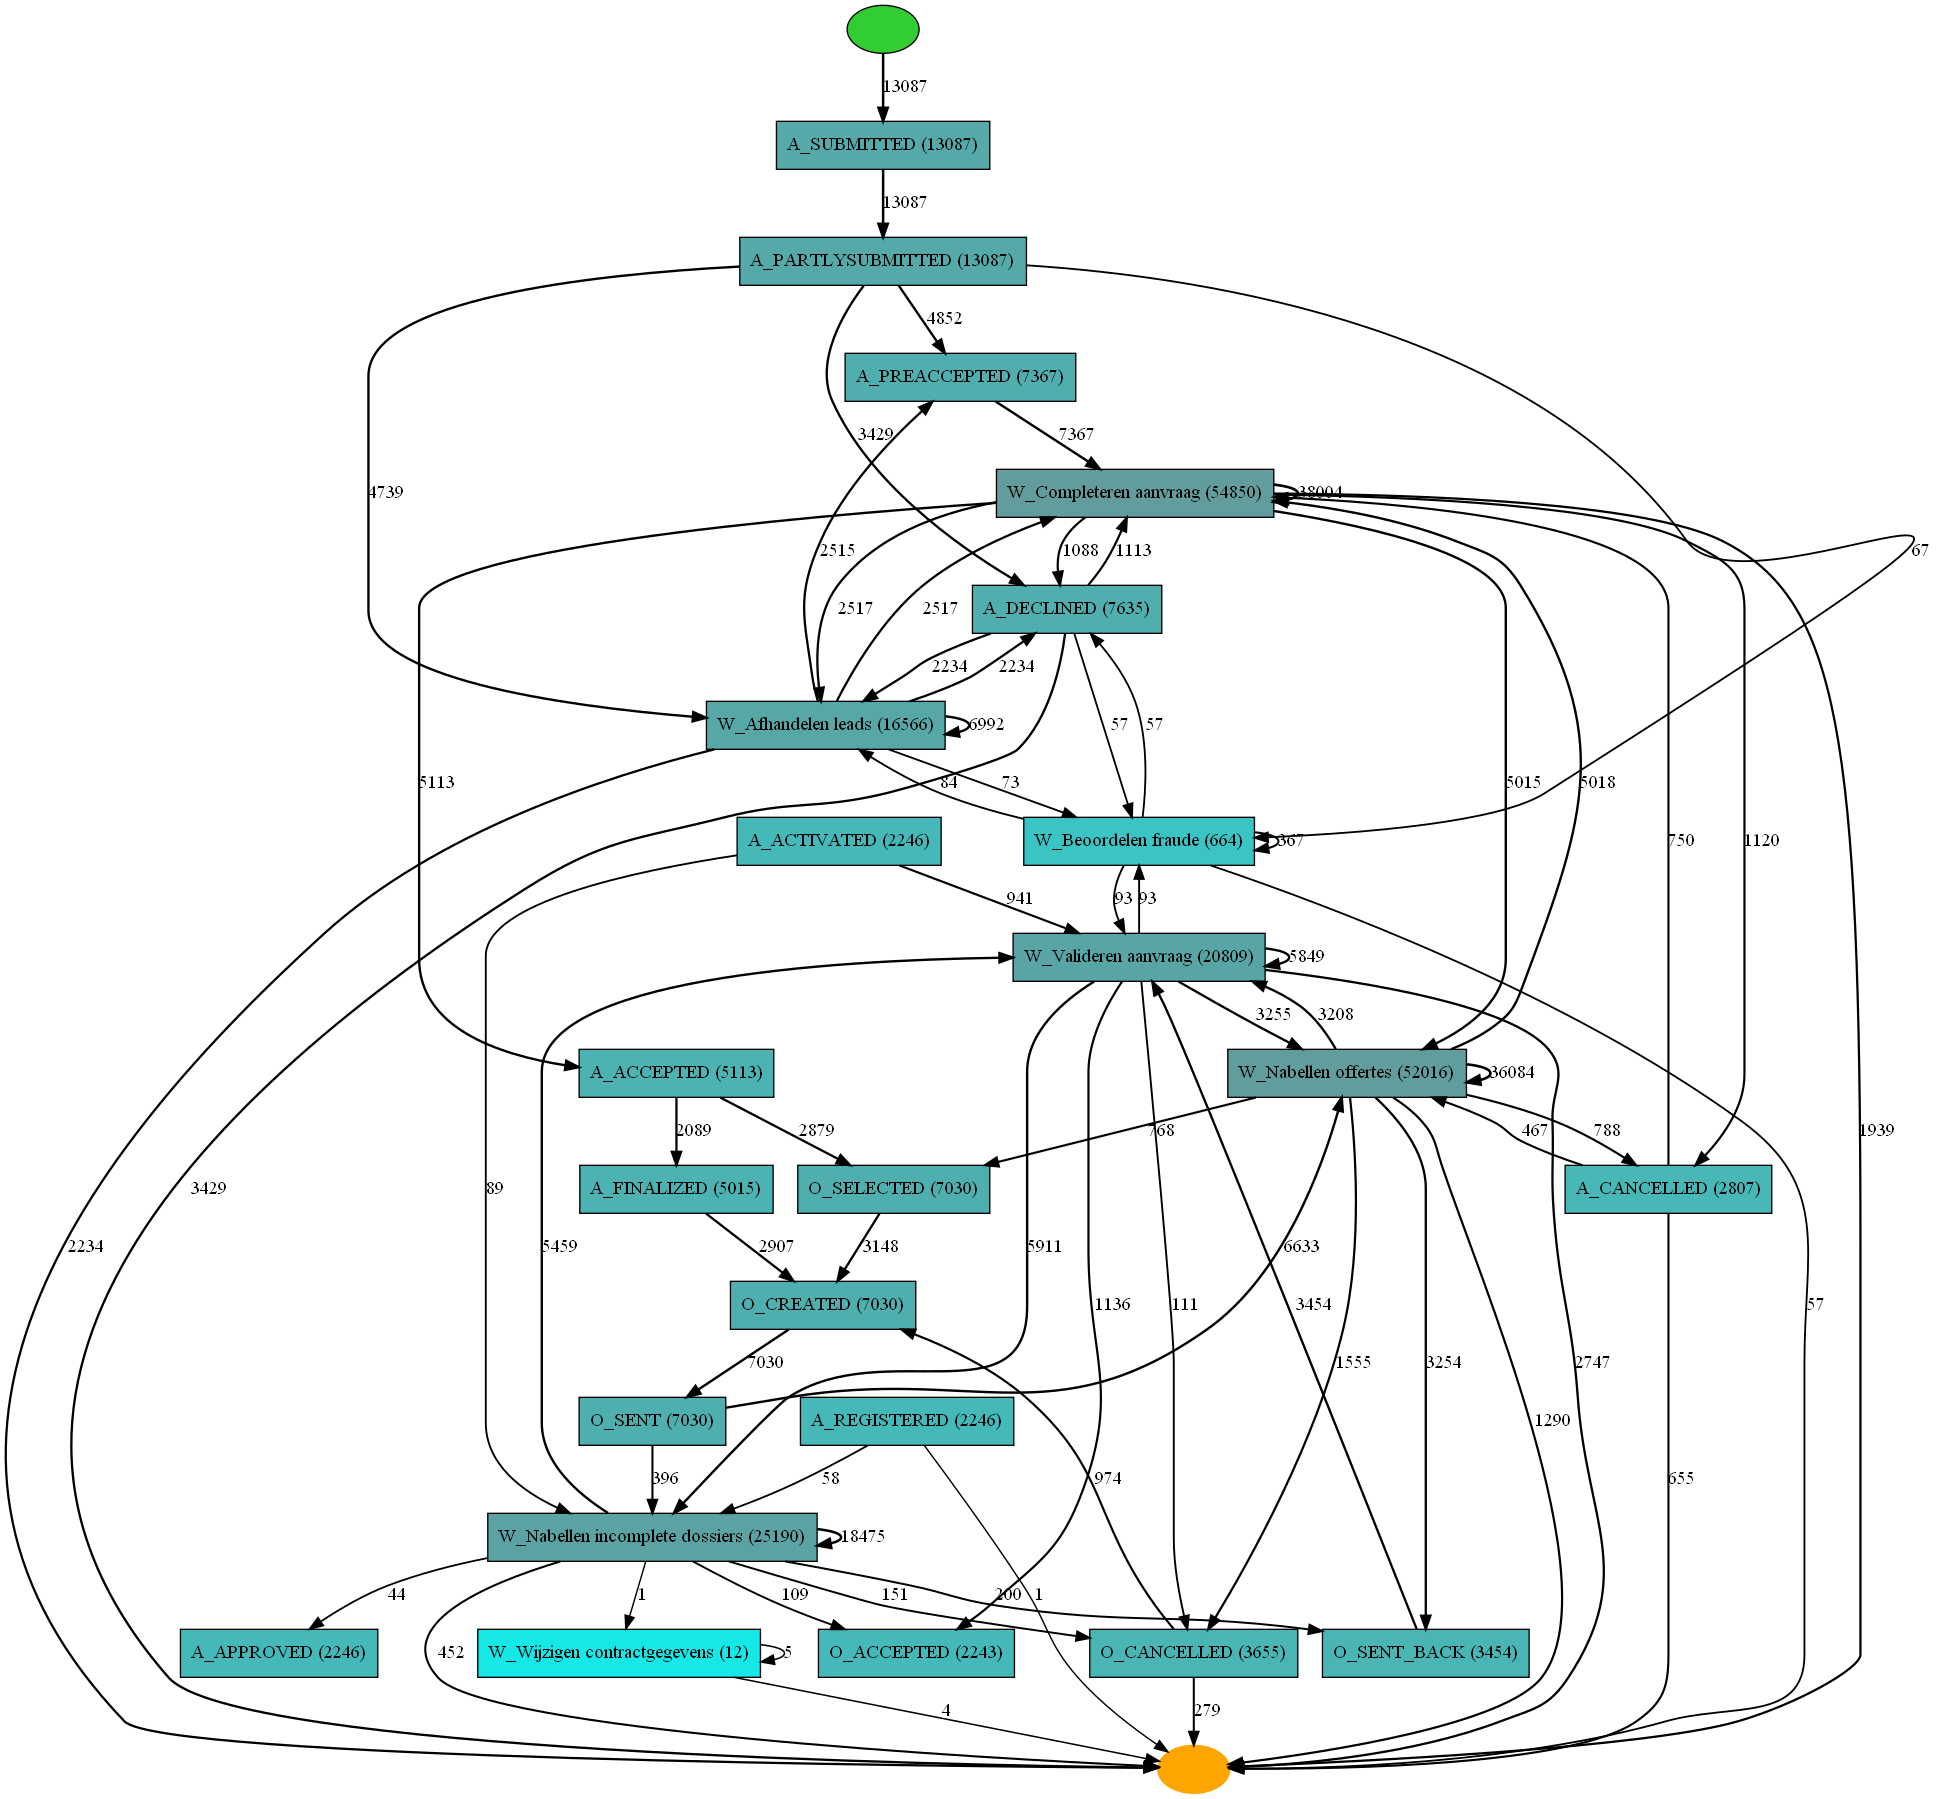

In [17]:
# Visualise model
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

<ipython-input-20-df2475cd54c0>:10: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking,


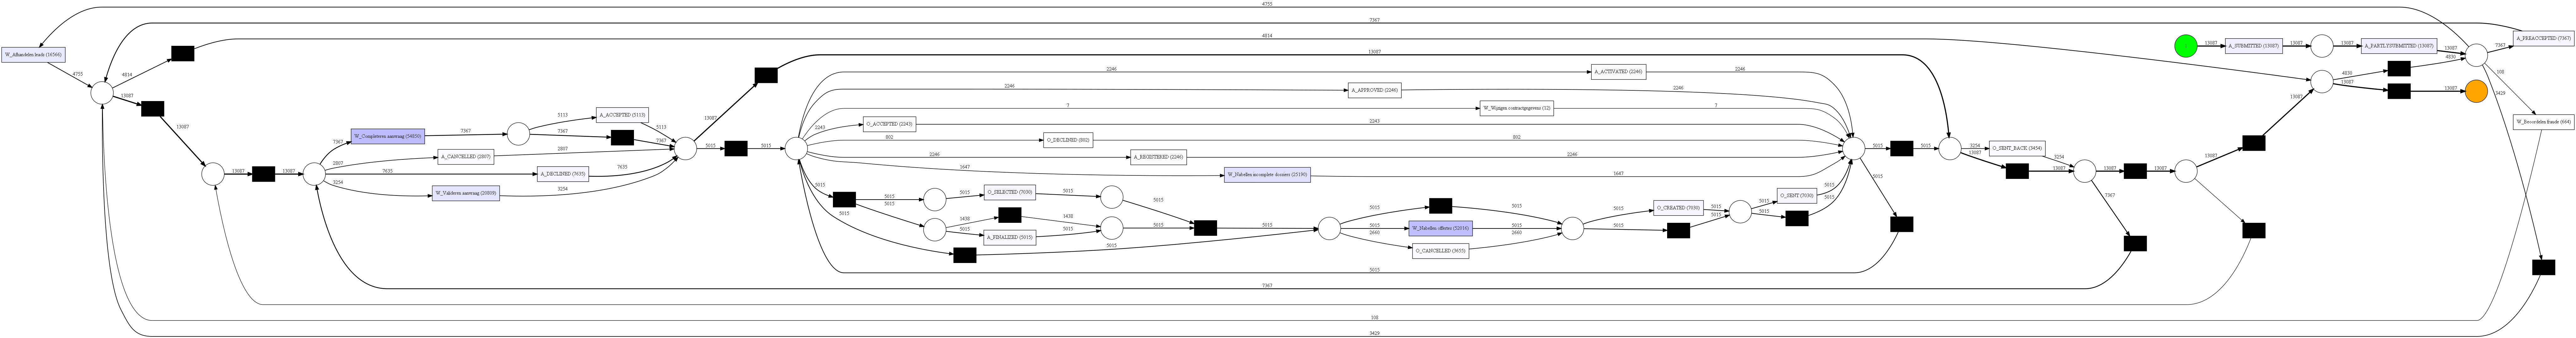

In [20]:
# Discover process tree using inductive miner
tree = inductive_miner.apply_tree(log)
## Either discover the petri net using inductive miner
net, initial_marking, final_marking = inductive_miner.apply(log)
## Or convert your existing model
net, initial_marking, final_marking = pt_converter.apply(tree)
## Then visualise
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
pn_visualizer.view(gviz)

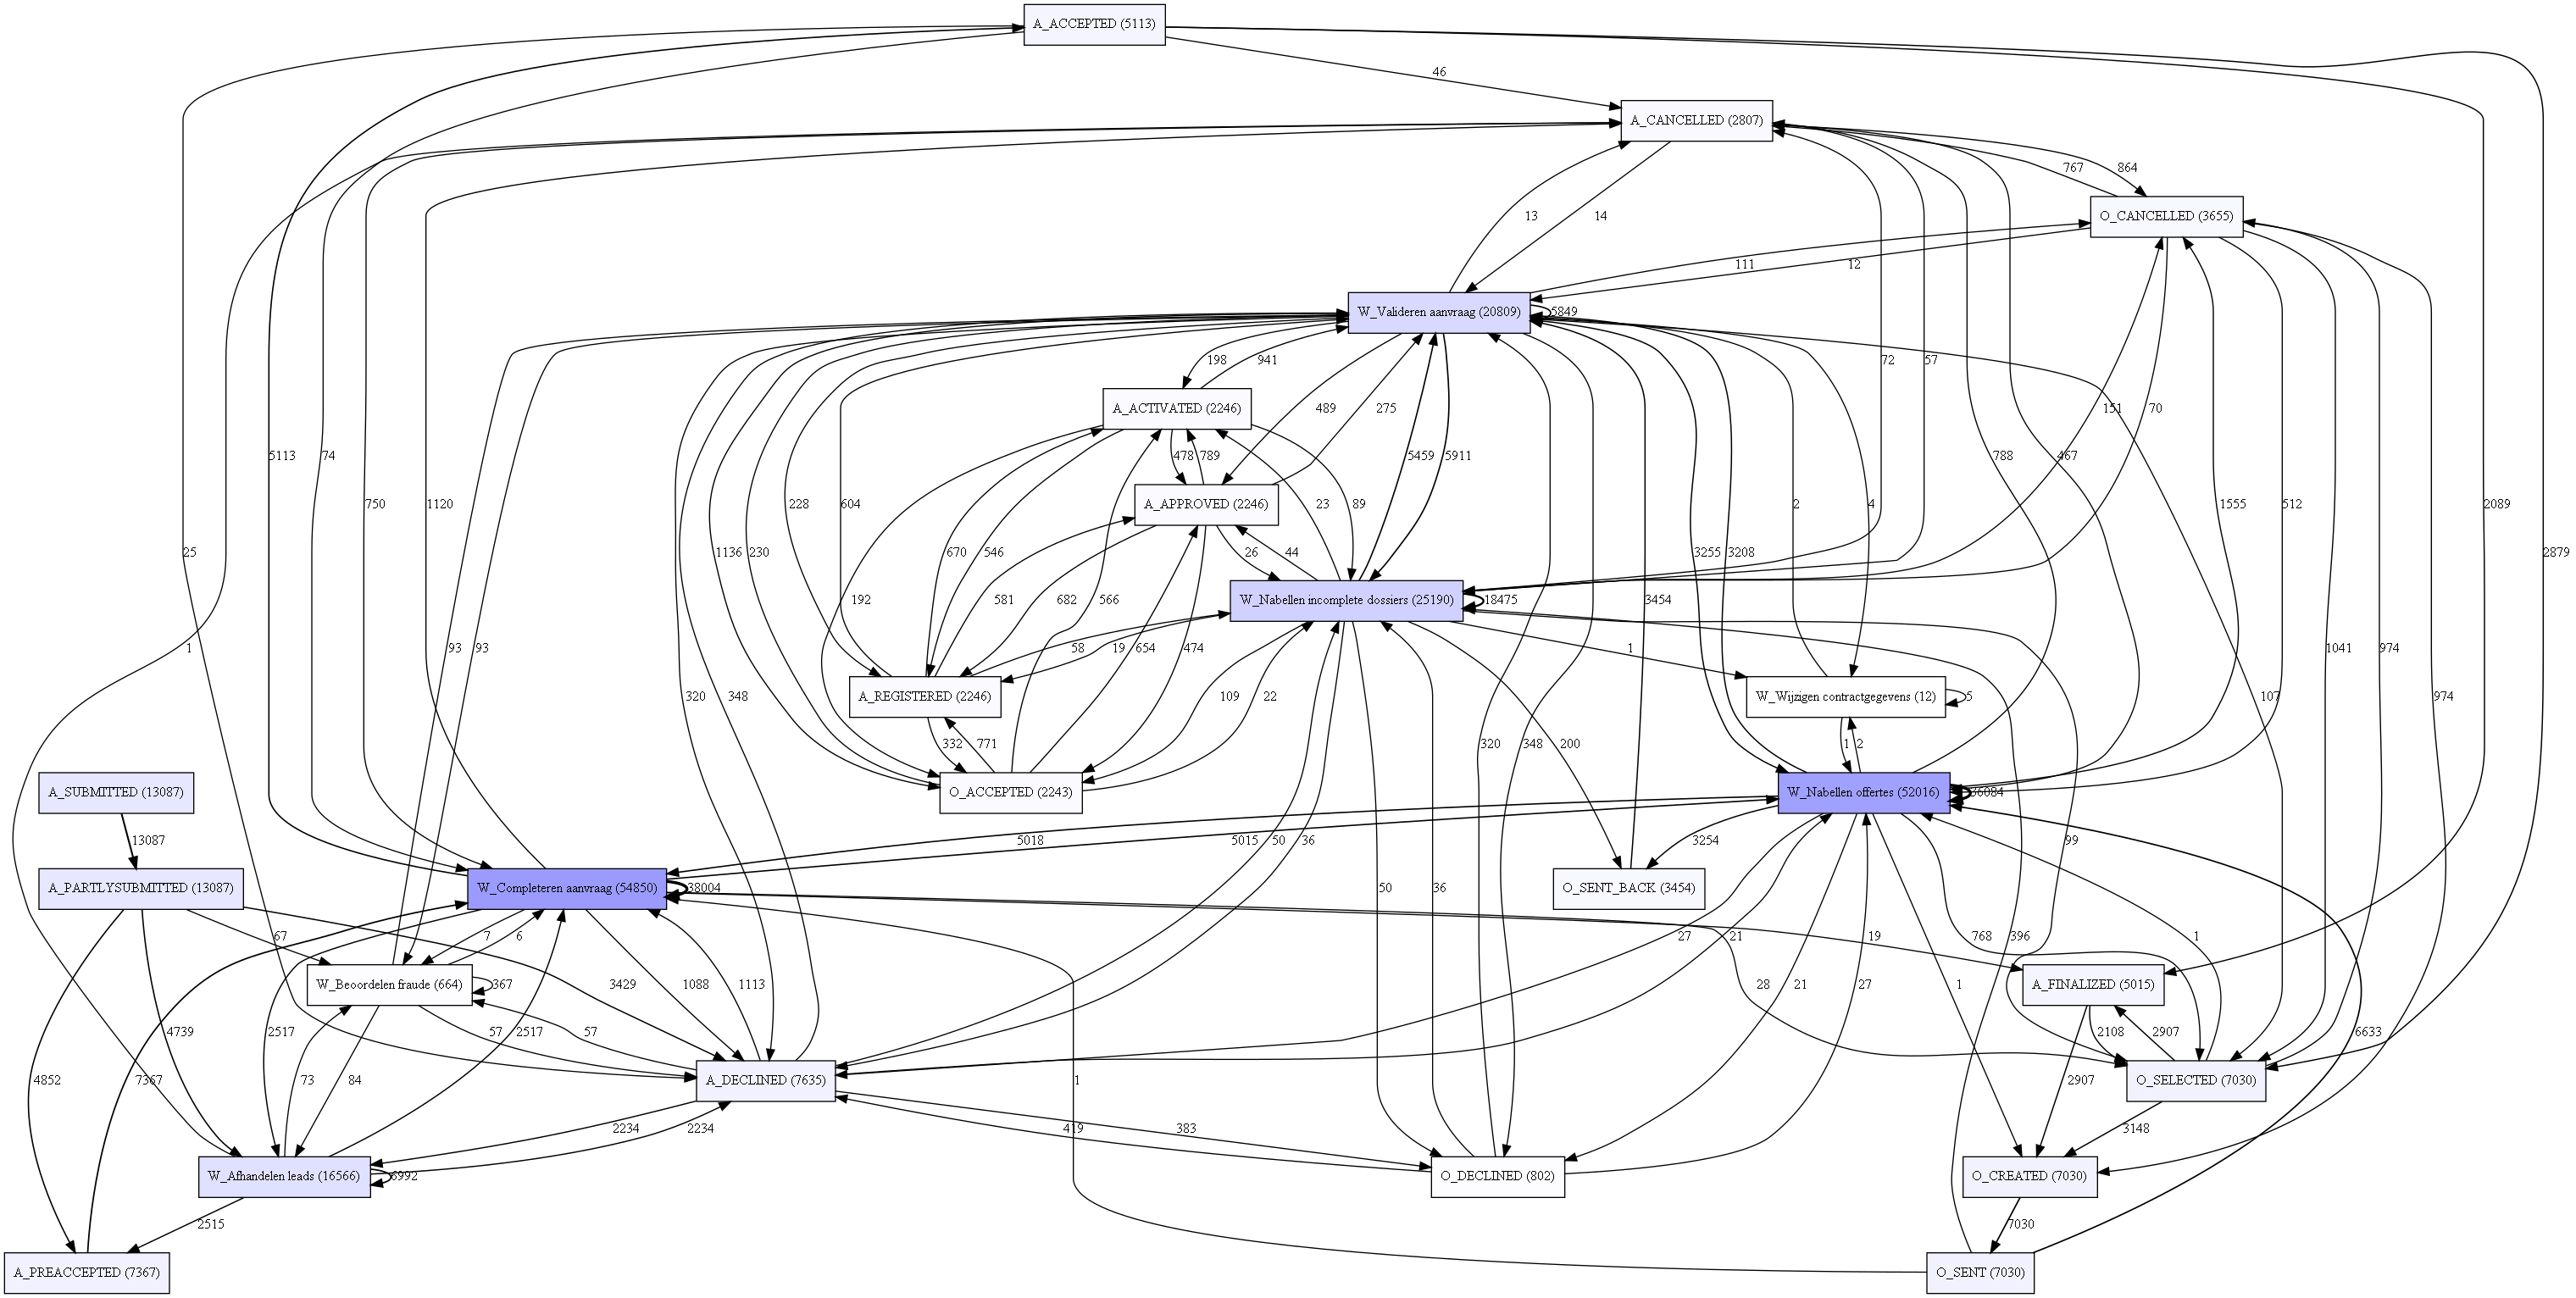

In [21]:
#Import the dfg_discovery algorithm
#Directly-follows graph
#Create graph from log
dfg = dfg_discovery.apply(log)
# Visualise
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)